#### The topics that we will cover in this chapter are as follows:

    1.  Getting a conceptual understanding of multilayer neural networks
    2.  Implementing the fundamental backpropagation algorithm for neural network training from scratch
    3.  Training a basic multilayer neural network for image classification

Modeling complex functions with artificial neural networks


#### Single-layer neural network recap

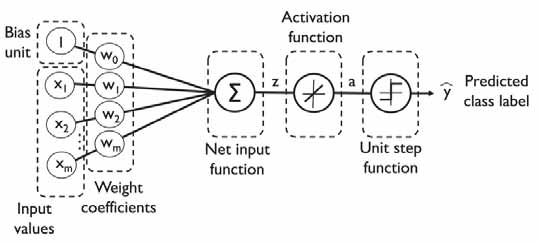

### Introducing the multilayer neural network
architecture

In this section, you will learn how to connect multiple single neurons to a multilayer
feedforward neural network; this special type of fully connected network is also called
Multilayer Perceptron (MLP).  The following figure illustrates the concept of an MLP
consisting of three layers:

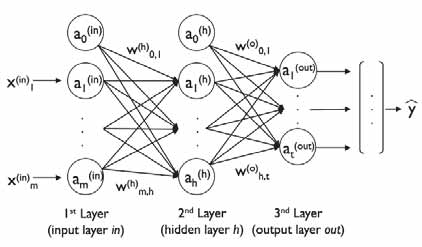

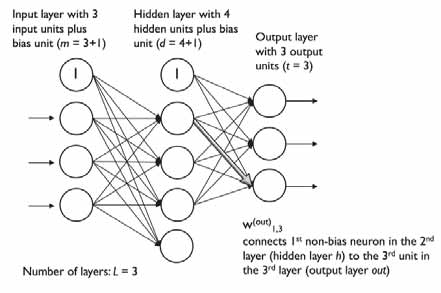

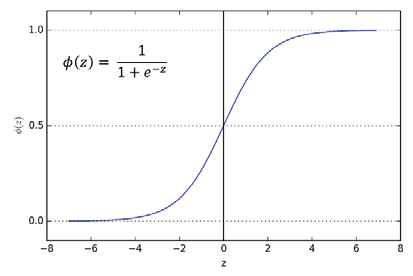

### Classifying handwritten digits

In the previous section, we covered a lot of the theory around neural networks,
which can be a little bit overwhelming if you are new to this topic. Before we
continue with the discussion of the algorithm for learning the weights of the MLP
model, backpropagation, let's take a short break from the theory and see a neural
network in action.

In [1]:
import os
import struct
import numpy as np

In [ ]:
import zipfile

with zipfile.ZipFile('archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
def load_mnist(path, kind='train'):
    "Load MNIST data from 'path' "
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) -.5) * 2

    return images, labels


In [16]:
from sklearn.datasets import load_digits

In [23]:
data = load_digits()
x = data.images
x

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.